A quick python parser for the data from the excellent website https://energy-charts.info/index.html?l=en&c=UK

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import timedelta
from functions.plot_prod import plot_prod

In [2]:
sns.set_style("whitegrid")

Matplotlib does not like the little legend hack we do in the plot_prod function, so we deactivate warnings.

In [3]:
import warnings
warnings.filterwarnings('ignore')

Single area graph with options for cumulative, rolling average, etc.
Pick country, year, and it plots the production (and load, if chosen).

https://energy-charts.info/charts/energy/data/eu/day_2015.json
https://energy-charts.info/charts/energy/data/eu/day_2019.json
https://energy-charts.info/charts/energy/data/eu/day_2020.json
https://energy-charts.info/charts/energy/data/eu/day_2021.json


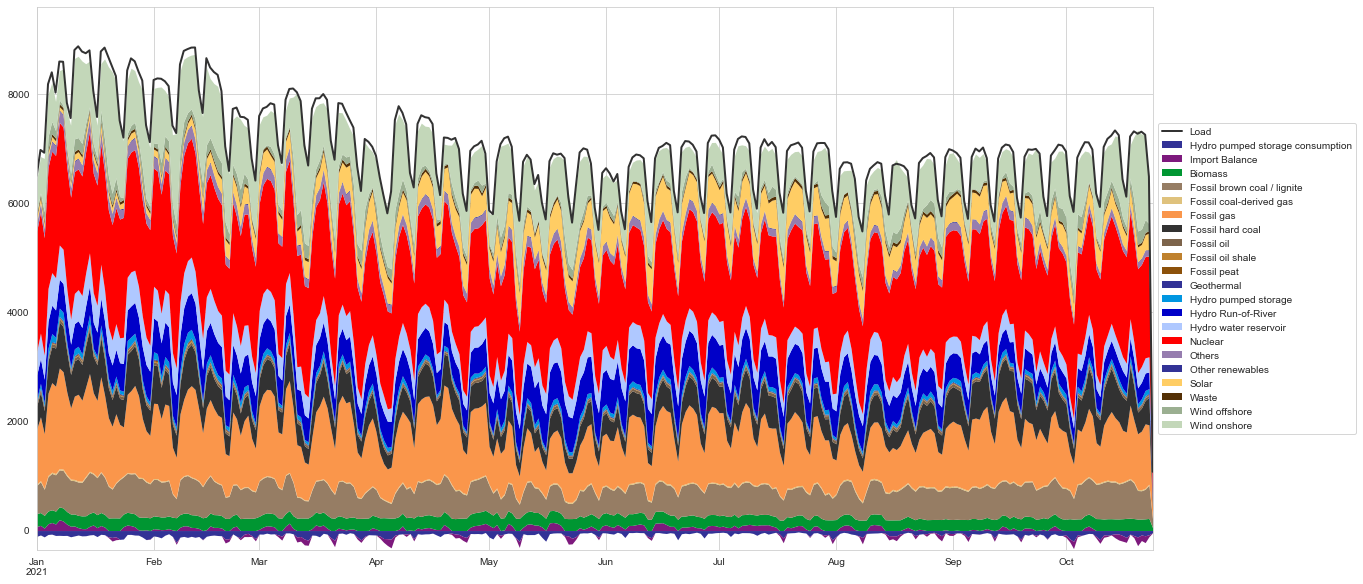

In [135]:
rolling=1 # rolling period (choose a multiple of 7 for best results)
country='eu'

prod_df_2015, load_df, colors_2015 = plot_prod(country=country, # country code
                             year='2015',  # year
                             display=False, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

# prod_df_2018, load_df, colors = plot_prod(country=country, # country code
#                              year='2018',  # year
#                              display=True, # display chart (or just save data)
#                              load=True,    # show load
#                              cumul=False,  # cumulative
#                              rolling=rolling,   # rolling average, in timesteps
#                              lang='en')    # language

prod_df_2019, load_df, colors_2019 = plot_prod(country=country, # country code
                             year='2019',  # year
                             display=False, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

prod_df_2020, load_df, colors_2020 = plot_prod(country=country, # country code
                             year='2020',  # year
                             display=False, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

prod_df_2021, load_df, colors_2021 = plot_prod(country=country, # country code
                             year='2021',  # year
                             display=True, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

Compare current year with average

In [175]:
# Get all color codes, necessary since label names change with year...
colors = {**colors_2019, **colors_2020, **colors_2021}

In [98]:
# The order is preserved, but label names change after 2019
prod_df_2019.columns = prod_df_2020.columns

In [136]:
av_1920 = (
#     prod_df_2015.reset_index().drop('index',axis=1)*0 + 
    prod_df_2019.reset_index().drop('index',axis=1)*1 + # if you pick Germany, multiply by 1000 for <2019 time series
    prod_df_2020.reset_index().drop('index',axis=1)*1
    )/2

In [138]:
av_1920.head()

,Hydro pumped storage consumption,Import Balance,Biomass,Fossil brown coal / lignite,Fossil coal-derived gas,Fossil gas,Fossil hard coal,Fossil oil,Fossil oil shale,Fossil peat,...,Hydro pumped storage,Hydro Run-of-River,Hydro water reservoir,Nuclear,Others,Other renewables,Solar,Waste,Wind offshore,Wind onshore
0,-150.009211,-150.596525,220.998854,441.144562,28.424894,889.124294,379.885829,44.083843,7.111200,18.698654,...,52.600397,413.454048,246.022507,2180.112293,170.097288,16.256434,113.918957,46.131845,108.261350,1115.708064
1,-98.584402,-65.321741,226.275139,580.069018,19.775261,1241.794402,498.474811,51.927509,9.283104,19.202918,...,90.117979,439.770485,351.490334,2236.936464,202.365230,16.357018,119.533469,45.081408,168.698645,1199.829739
2,-80.170454,-52.448909,229.024987,634.348896,21.073238,1392.678283,598.013443,52.469462,10.218048,20.347200,...,101.877346,443.790163,374.393222,2249.909842,173.591597,16.353235,96.610200,46.696613,149.843232,1159.375109
3,-97.714186,-97.667712,228.825288,619.155557,21.982267,1349.346557,551.361485,52.636992,11.483952,20.084496,...,69.410506,432.087509,360.973517,2246.593142,170.283211,16.414666,92.769163,46.668864,152.464363,1251.358589
4,-94.774493,-63.165014,230.419771,631.614926,22.966392,1218.813931,499.856251,45.306336,10.205712,19.000248,...,57.390206,395.770589,346.225166,2254.211990,169.755187,16.446197,102.691680,46.336934,133.213291,988.613712


In [139]:
# Calculate delta (in GWh) and ratio (in %)
delta = (prod_df_2021.reset_index().drop('index',axis=1)-av_1920.reset_index().drop('index',axis=1))
delta.index = prod_df_2020.index # best to reindex with 2020 numbers since it's a leap year

ratio = (prod_df_2021.reset_index().drop('index',axis=1)/av_1920.reset_index().drop('index',axis=1) - 1)
ratio.index = prod_df_2020.index

In [146]:
# Also difference in shares if you're interested
share_diff_2021 = prod_df_2021.sum()/prod_df_2021.sum().sum() - av_1920.sum()/av_1920.sum().sum()

In [140]:
# Aggregate delta to the desired timestep (W = week, M = month, etc.)
delta_sum = delta.groupby(pd.Grouper(freq='W')).sum()
delta_sum.index = delta_sum.index.strftime('%U')

In [141]:
ratio_sum = (prod_df_2020.groupby(pd.Grouper(freq='M')).sum()/
             av_1820.set_index(prod_df_2020.index).groupby(pd.Grouper(freq='M')).sum() - 1)
ratio_sum.index = ratio_sum.index.strftime('%B')

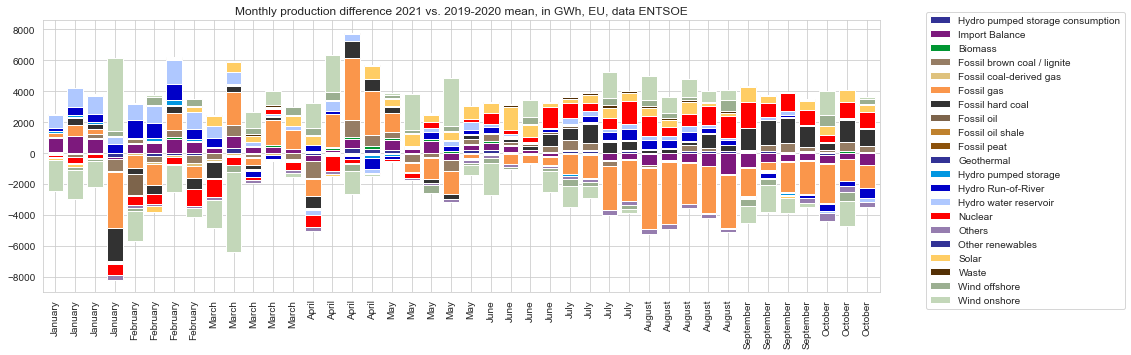

In [134]:
# Use this if you only want a subset
techs =['Wind onshore',
        'Wind offshore',
        'Solar',
        'Nuclear',
#       'Hydro Power',
        'Fossil gas',
#       'Oil',
        'Fossil hard coal',
        'Fossil brown coal / lignite'
        ]

fig, ax = plt.subplots(figsize=(15,5))

delta_sum.iloc[:42,:].plot.bar(stacked=True,
                            color=colors,
                            ax=ax,
                            width=.8,
                            title='Weekly production difference 2021 vs. 2019-2020 mean, in GWh, EU, data ENTSOE')

ax.legend(bbox_to_anchor=(1.05, 1.05))

<AxesSubplot:title={'center':'Monthly production difference 2021 vs. 2015 mean, in GWh, UK, data ENTSOE'}>

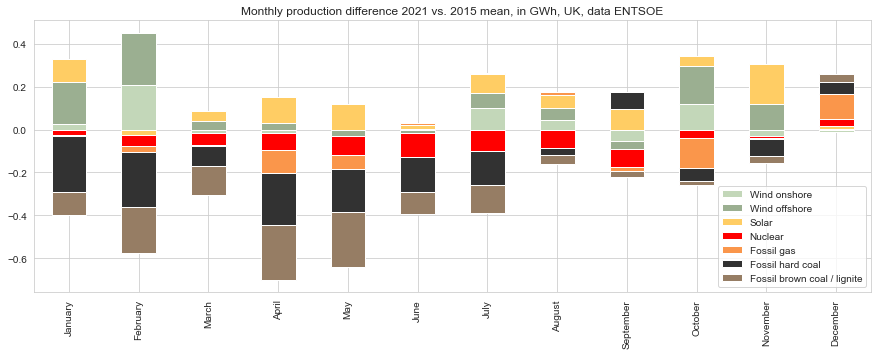

In [144]:
# Example for monthly difference and tech subset
ratio_sum[techs].plot.bar(stacked=True,
                        color=colors,
                        figsize=(15,5),
                        title='Monthly production difference 2021 vs. 2019-2020 mean, relative, EU, data ENTSOE')

<AxesSubplot:>

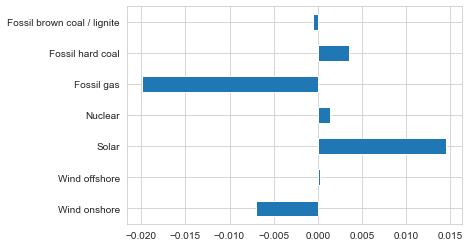

In [152]:
# Difference in share of annual mix in percentage points ("-0.02" means it decreased from x% to (x-2)%)
share_diff_2021[techs].plot.barh(stacked=True)

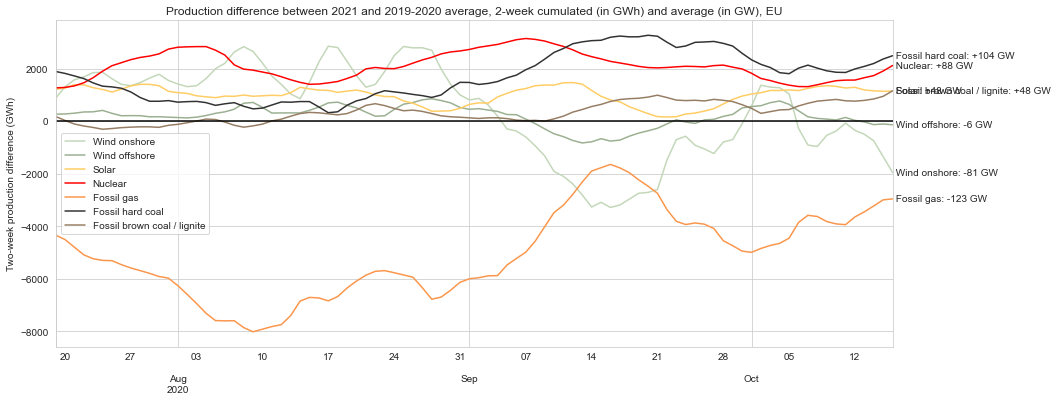

In [159]:
# Some other tests
fig, ax = plt.subplots(figsize=(15,6), facecolor='w')
to_plot = delta[techs].rolling(14).sum().iloc[200:290,:]

to_plot.plot(ax=ax,
             title='Production difference between 2021 and 2019-2020 average, 2-week cumulated (in GWh) and average (in GW), EU',
            color=colors)

for c in to_plot:
    plt.text(to_plot.index[-1],
             to_plot[c][-1],
             f' {c}: {to_plot[c][-1]/(rolling*24):+.0f} GW',
            ha='left', va='center')
    
ax.set_ylabel('Two-week production difference (GWh)')

plt.axhline(1,color='k')

# TODO: change the year from 2020 to 2021

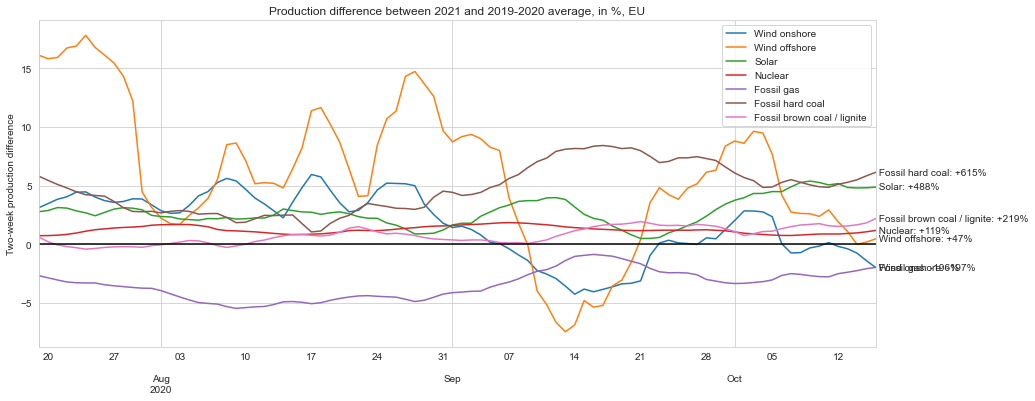

In [161]:
fig, ax = plt.subplots(figsize=(15,6), facecolor='w')
ratio.index = prod_df_2020.index
to_plot = ratio[techs].rolling(14).sum().iloc[200:290,:]

to_plot.plot(ax=ax, title='Production difference between 2021 and 2019-2020 average, in %, EU')

for c in to_plot:
    plt.text(to_plot.index[-1],
             to_plot[c][-1],
             f' {c}: {to_plot[c][-1]*100:+.0f}%',
            ha='left', va='center')
ax.set_ylabel('Two-week production difference')
plt.axhline(0,color='k')

For country comparison, you need to collect separate data and harmonise (labels are inconsistent).

In [162]:
to_plot.index[-1]

Timestamp('2020-10-16 00:00:00')

In [163]:
all_prods = dict()

In [409]:
year_range = range(2015,2022)

colors={}

for country in ['fr','de','dk']:
    all_prods[country] = dict()
    for year in year_range: 
        all_prods[country][year], _, colors_i = plot_prod(country=country, year=year, display=False, load=False)
    colors.update(**colors_i)

https://energy-charts.info/charts/energy/data/fr/day_2015.json
https://energy-charts.info/charts/energy/data/fr/day_2016.json
https://energy-charts.info/charts/energy/data/fr/day_2017.json
https://energy-charts.info/charts/energy/data/fr/day_2018.json
https://energy-charts.info/charts/energy/data/fr/day_2019.json
https://energy-charts.info/charts/energy/data/fr/day_2020.json
https://energy-charts.info/charts/energy/data/fr/day_2021.json
https://energy-charts.info/charts/energy/raw_data/de/day_2015.json
https://energy-charts.info/charts/energy/raw_data/de/day_2016.json
https://energy-charts.info/charts/energy/raw_data/de/day_2017.json
https://energy-charts.info/charts/energy/raw_data/de/day_2018.json
https://energy-charts.info/charts/energy/data/de/day_2019.json
https://energy-charts.info/charts/energy/data/de/day_2020.json
https://energy-charts.info/charts/energy/data/de/day_2021.json
https://energy-charts.info/charts/energy/data/dk/day_2015.json
https://energy-charts.info/charts/energ

In [424]:
colors_annual_raw = {}
alpha_thr = 0.15

for k,v in colors.items():
    for year in year_range:
        colors_annual_raw[(year,k)] = tuple((*v, alpha_thr + (1-alpha_thr) * (year-year_range[0])/(year_range[-1]-year_range[0])))

In [425]:
columns_agg = {'Hydro pumped storage consumption': 'Hydro pumped storage consumption',
               'Import Balance': 'Import balance',
               'Biomass': 'Biomass',
               'Fossil gas': 'Fossil gas',
               'Fossil oil': 'Fossil oil',
               'Hydro pumped storage': 'Hydro pumped storage generation',
               'Hydro Run-of-River': 'Hydro run-of-river',
               'Nuclear': 'Nuclear',
               'Others': 'Others',
               'Solar': 'Solar',
               'Waste': 'Waste',
               'Wind offshore': 'Wind',
               'Wind onshore': 'Wind',
               'Pumped Storage consumption': 'Hydro pumped storage consumption',
               'Hydro Power': 'Hydro',
               'Uranium': 'Nuclear',
               'Brown Coal': 'Brown coal',
               'Hard Coal': 'Hard coal',
               'Oil': 'Fossil oil',
               'Gas': 'Fossil gas',
               'Pumped Storage generation': 'Hydro pumped storage generation',
               'Wind': 'Wind',
               'Hydro Pumped Storage consumption': 'Hydro pumped storage consumption',
               'Fossil Brown Coal': 'Brown coal',
               'Fossil Hard Coal': 'Hard coal',
               'Fossil Oil': 'Fossil oil',
               'Fossil Gas': 'Fossil gas',
               'Hydro Pumped Storage generation': 'Hydro pumped storage generation',
               'Hydro Water Reservoir': 'Hydro',
               'Hydro water reservoir': 'Hydro',
               'Fossil hard coal': 'Hard coal'}

In [426]:
columns_agg2 = {'Hydro pumped storage consumption': 'Renewable firm',
               'Import Balance': 'Import balance',
               'Biomass': 'Renewable firm',
               'Fossil gas': 'Fossil',
               'Fossil oil': 'Fossil',
               'Hydro pumped storage': 'Renewable firm',
               'Hydro Run-of-River': 'Renewable firm',
               'Nuclear': 'Nuclear',
               'Others': 'Others',
               'Solar': 'Renewable variable',
               'Waste': 'Renewable firm',
               'Wind offshore': 'Renewable variable',
               'Wind onshore': 'Renewable variable',
               'Pumped Storage consumption': 'Renewable firm',
               'Hydro Power': 'Renewable firm',
               'Uranium': 'Nuclear',
               'Brown Coal': 'Fossil',
               'Hard Coal': 'Fossil',
               'Oil': 'Fossil',
               'Gas': 'Fossil',
               'Pumped Storage generation': 'Renewable firm',
               'Wind': 'Renewable variable',
               'Hydro Pumped Storage consumption': 'Renewable firm',
               'Fossil Brown Coal': 'Fossil',
               'Fossil Hard Coal': 'Fossil',
               'Fossil Oil': 'Fossil',
               'Fossil Gas': 'Fossil gas',
               'Hydro Pumped Storage generation': 'Renewable firm',
               'Hydro Water Reservoir': 'Renewable firm',
               'Hydro water reservoir': 'Renewable firm',
               'Fossil hard coal': 'Fossil'}

In [428]:
colors_annual = colors_annual_raw.copy()

for k,v in colors_annual_raw.items():

    if k[1] in columns_agg.keys():
        print(k)
        colors_annual[(k[0],columns_agg[k[1]])] = v
        
    if k[1].capitalize() in columns_agg.keys():
        print(k)
        colors_annual[(k[0],columns_agg[k[1].capitalize()])] = v

(2015, 'Hydro pumped storage consumption')
(2015, 'Hydro pumped storage consumption')
(2016, 'Hydro pumped storage consumption')
(2016, 'Hydro pumped storage consumption')
(2017, 'Hydro pumped storage consumption')
(2017, 'Hydro pumped storage consumption')
(2018, 'Hydro pumped storage consumption')
(2018, 'Hydro pumped storage consumption')
(2019, 'Hydro pumped storage consumption')
(2019, 'Hydro pumped storage consumption')
(2020, 'Hydro pumped storage consumption')
(2020, 'Hydro pumped storage consumption')
(2021, 'Hydro pumped storage consumption')
(2021, 'Hydro pumped storage consumption')
(2015, 'Import Balance')
(2016, 'Import Balance')
(2017, 'Import Balance')
(2018, 'Import Balance')
(2019, 'Import Balance')
(2020, 'Import Balance')
(2021, 'Import Balance')
(2015, 'Biomass')
(2015, 'Biomass')
(2016, 'Biomass')
(2016, 'Biomass')
(2017, 'Biomass')
(2017, 'Biomass')
(2018, 'Biomass')
(2018, 'Biomass')
(2019, 'Biomass')
(2019, 'Biomass')
(2020, 'Biomass')
(2020, 'Biomass')
(2021, 

In [430]:
raw_agg = pd.concat([pd.concat(p, axis=0) for p in all_prods.values()],
                    keys=all_prods.keys())
prod_agg = raw_agg.groupby(columns_agg, axis=1).sum()
prod_agg.index.names=('country','year','date')
prod_agg = prod_agg.reset_index()
prod_agg['day of year'] = prod_agg['date'].dt.dayofyear
prod_agg = prod_agg.drop('date',axis=1)
# prod_agg = prod_agg.drop('date')
prod_agg = prod_agg.set_index(['day of year','year','country']).unstack(['year','country'])
prod_agg = prod_agg.reorder_levels(order=[2,1,0],axis=1)
try:
    prod_agg['de',2015]*=1000
    prod_agg['de',2016]*=1000
    prod_agg['de',2017]*=1000
    prod_agg['de',2018]*=1000
    prod_agg['de',2019]*=1000
except:
    pass

In [431]:
countries = prod_agg.columns.levels[0]
countries

Index(['de', 'dk', 'fr'], dtype='object', name='country')

In [432]:
prod_agg.columns.levels

FrozenList([['de', 'dk', 'fr'], [2015, 2016, 2017, 2018, 2019, 2020, 2021], ['Biomass', 'Brown coal', 'Fossil gas', 'Fossil oil', 'Hard coal', 'Hydro', 'Hydro pumped storage consumption', 'Hydro pumped storage generation', 'Hydro run-of-river', 'Import balance', 'Nuclear', 'Others', 'Solar', 'Waste', 'Wind']])

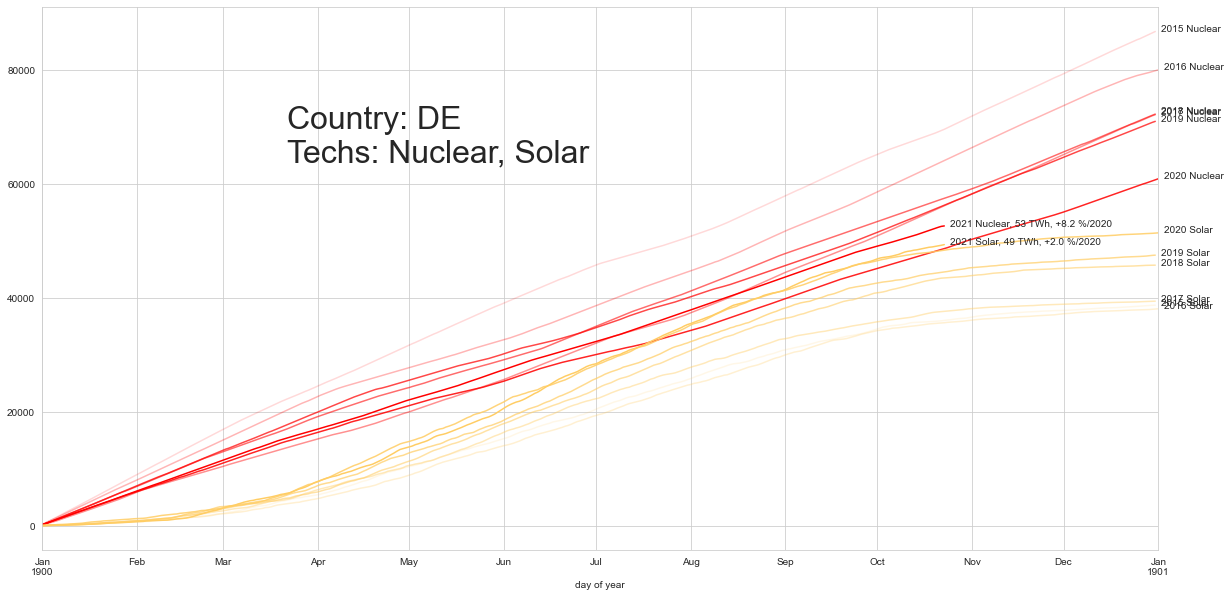

In [439]:
tech = ('Nuclear',
       'Solar')

country = 'de'

cumul = prod_agg.loc[:,(countries,slice(None),tech)].cumsum(skipna=True)[country]
cumul.index = pd.to_datetime(cumul.index, format='%j')
cumul.columns.names = ['year','tech']
# cumul = cumul.groupby('year', axis=1).sum(min_count=1)
fig, ax = plt.subplots(figsize=(20,10), facecolor='w')

cumul.plot(color=colors_annual, ax=ax)

for c in cumul.columns:
    
    last_v = cumul[c].last_valid_index()
    
    if last_v != None:

        if c[0] == 2021:
            v_2020 = cumul.loc[last_v,(2020,c[1])]
            gap = cumul[c][last_v] - v_2020 
            delta = 100 * (cumul[c][last_v]/v_2020 - 1)
            label = f'{c[0]} {c[1]}, {cumul[c][last_v]/1000:0.0f} TWh, {delta:+0.1f} %/2020'
#             label = f'{c[0]} {c[1]}'
        else:
            label = f'{c[0]} {c[1]}'

        plt.text(last_v + timedelta(days=2),
                 cumul[c][last_v],
                 label)
        
plt.text(cumul.index[80], ax.get_ylim()[1] * .7, f'Country: {country.upper()} \nTechs: ' + ', '.join(tech), fontsize=32)
# plt.text(-15, ax.get_ylim()[1] * .95, '@thomasgibon', fontsize=12, color='gray')
# plt.title(f'Cumulated production of {tech} power over 2019–2021 in Germany')
# ax.set_ylabel('GWh')

ax.get_legend().remove()

In [38]:
prod = pd.concat([prod_df_2019,prod_df_2020,prod_df_2021])
prod_ag = prod.groupby(columns_agg, axis=1).sum()

KeyError: ('de', 2015, 'Solar')

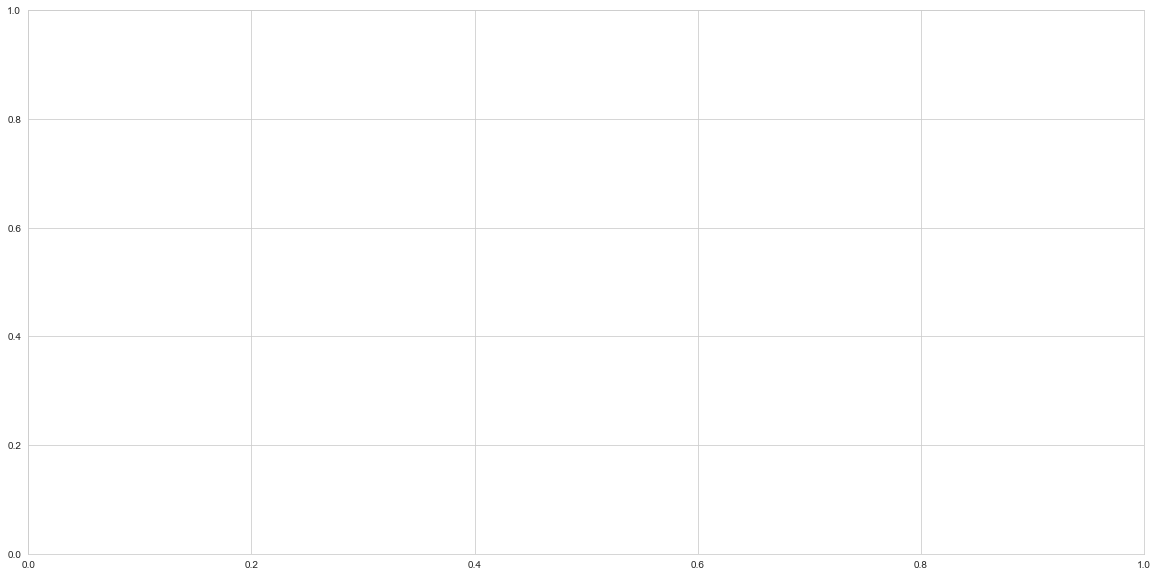

In [249]:
roll = prod_agg.loc[:,([c for c in countries if c not in ['pl']],slice(None),tech)].rolling(14).mean()

fig, ax = plt.subplots(figsize=(20,10), facecolor='w')

roll.plot(color=colors, ax=ax)

for c in roll.columns:
    last_v = roll[c].last_valid_index()
    
    if last_v != None:

        if c[1] == '2021':
            v_2020 = roll.loc[last_v,(c[0], '2020', tech)]
            gap = roll[c][last_v] - v_2020 
            delta = 100 * (roll[c][last_v]/v_2020 - 1)
#             label = f'{c[0]} {c[1]}, {roll[c][last_v]:0.0f} GWh, {delta:+0.1f} %/2020'
        else:
            label = f'{c[0]} {c[1]}'

        plt.text(roll[c].last_valid_index() + 5,
                 roll[c][roll[c].last_valid_index()],
                 label)
plt.text(200, ax.get_ylim()[1] * .6, tech, fontsize=40)
plt.text(0, ax.get_ylim()[1] * .95, '@thomasgibon', fontsize=12, color='gray')
plt.title(f'Rolling 15-day average production of {tech} power over 2019–2021 in EU')
ax.set_ylabel('GWh')
ax.get_legend().remove()

# Correlations

ValueError: Could not interpret value `Fossil gas` for parameter `x`

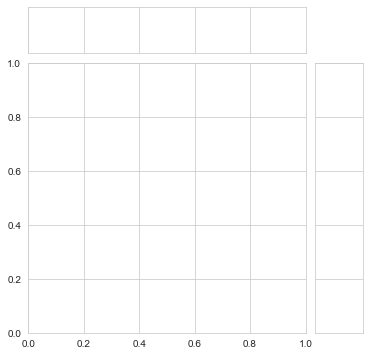

In [40]:
x = 'Fossil gas'
y = 'Wind onshore'

j = sns.jointplot(data=prod_df_2021.dropna(),
              x=x,
              y=y,
              kind='kde',
              fill=True,
#               cbar=True,
                 )

r, p = stats.pearsonr(prod_df_2021.dropna()[x], prod_df_2021.dropna()[y])
print(r,p)

In [ ]:
x = 'Nuclear'
y = 'Renewable variable'

j = sns.jointplot(data=prod_ag,
                  space=0,
              x=x,
              y=y,
              kind='kde',
              fill=True,
              cbar=True,
                 )

r, p = stats.pearsonr(prod_ag[x], prod_ag[y])
print(r,p)

In [ ]:
x = 'Nuclear'
y = 'Fossil'

j = sns.jointplot(data=prod_ag,
              x=x,
              y=y,
              kind='kde',
              fill=True,
              cbar=True)

r, p = stats.pearsonr(prod_ag[x], prod_ag[y])
print(r,p)